# CAR PRICE ESTIMATION MODEL PROJECT - OUTLIERS

## IMPORTING THE LIBRARIES

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings;
warnings.filterwarnings("ignore")
import re
pd.set_option("display.max_columns",None)

In [2]:
auto = pd.read_csv('auto_scout_filled.csv')
df = auto.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15919 non-null  int64  
 1   make_model             15919 non-null  object 
 2   price                  15919 non-null  float64
 3   vat                    15919 non-null  object 
 4   km                     15919 non-null  float64
 5   registration           15919 non-null  float64
 6   prev_owner             15919 non-null  float64
 7   hp                     15919 non-null  float64
 8   Type                   15919 non-null  object 
 9   Inspection new         15919 non-null  object 
 10  Warranty(months)       15919 non-null  float64
 11  Body Color             15919 non-null  object 
 12  Paint Type             15919 non-null  object 
 13  Body                   15919 non-null  object 
 14  Nr. of Doors           15919 non-null  float64
 15  Nr

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

## CLEANING OUTLIERS

In [6]:
df.describe()

,price,km,registration,prev_owner,hp,Warranty(months),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
count,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,18019.896727,32104.561016,2017.605377,0.998115,88.385012,6.684654,4.660657,4.952258,1426.641498,3.785162,1343.689616,117.583579,5.939820,4.879594,2.042779,12.004020,4.283435,11.567686
std,7386.169409,36971.241562,1.122170,0.327945,26.840402,13.330917,0.642198,0.476599,313.985143,0.419201,211.579031,19.966895,0.791983,1.556867,1.695131,5.001606,2.324816,6.455813
min,13.000000,0.000000,2016.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12850.000000,2558.013043,2017.000000,1.000000,66.000000,0.000000,4.000000,5.000000,1229.000000,4.000000,1163.000000,104.000000,5.000000,4.100000,1.000000,10.000000,2.000000,6.000000
50%,16900.000000,20436.000000,2018.000000,1.000000,85.000000,0.000000,5.000000,5.000000,1461.000000,4.000000,1279.000000,117.000000,6.000000,4.800000,2.000000,13.000000,5.000000,12.000000
75%,21900.000000,46914.000000,2019.000000,1.000000,101.000000,12.000000,5.000000,5.000000,1598.000000,4.000000,1485.000000,128.000000,6.000000,5.400000,3.000000,15.000000,6.000000,16.000000
max,74600.000000,317000.000000,2019.000000,4.000000,294.000000,72.000000,7.000000,7.000000,16000.000000,8.000000,2471.000000,990.000000,50.000000,55.000000,10.000000,29.000000,10.000000,33.000000


### Column 2: Price

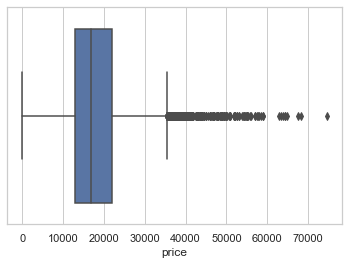

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["price"])

According to our boxplot, cars with prices more than 35k are outliers. Yet, a high price is not an unlikely situation in real life. Instead, lower prices, particularly the ones closer to the zero, are more unlikely.

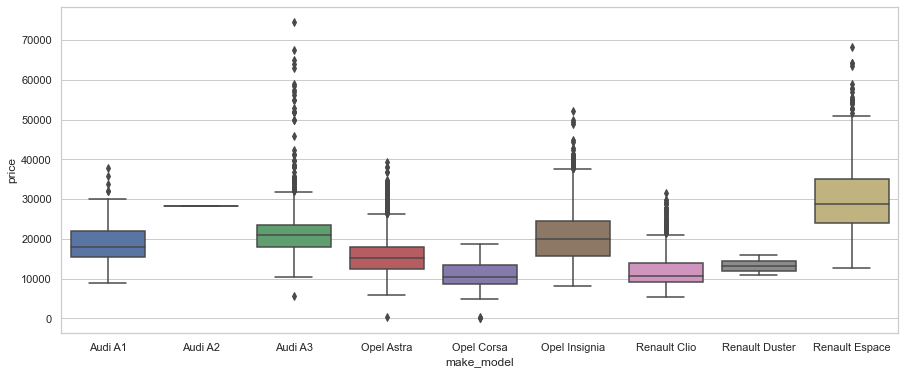

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(y='price',data=df, x='make_model');

In [11]:
#Drop the values less than 4000
df.drop((df[df.price < 4000].price.index), axis=0, inplace=True)

### Column : km

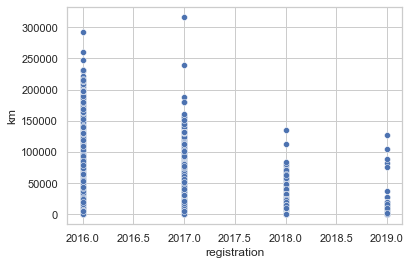

In [12]:
sns.scatterplot(data=df, x="registration", y="km");

There are some cars with too high and too low kilometers. Yet, this is not an unlikely situation in real life. Thus, we do not make any change in this column.

### Column: registration

In [13]:
#This column has only 4 values.
df.registration.value_counts()

2018.0    4523
2019.0    4409
2016.0    3710
2017.0    3273
Name: registration, dtype: int64

In [14]:
#We can convert this column from year to age which is a healthier feature for price estimation
df.registration = 2019 - df.registration

### Column: pre_owner

In [15]:
#There are 5 different values in this column.
df.prev_owner.value_counts(dropna=False)

1.0    14270
0.0      848
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64

### Column: hp

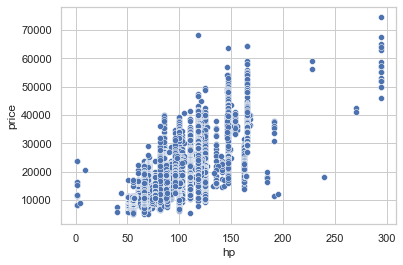

In [18]:
sns.scatterplot(data=df, x="hp", y="price");

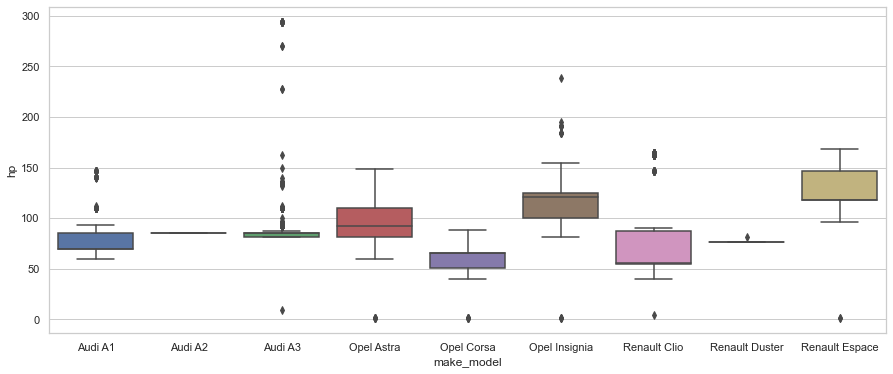

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(y='hp',data=df, x='make_model');

Some cars seem to have almost zero horse power.

In [20]:
#Cars with less than 50 horse power
df[df['hp'] < 50].hp.value_counts(dropna=False)

1.0     20
40.0     2
44.0     1
4.0      1
9.0      1
Name: hp, dtype: int64

In [21]:
#We will convert these values first to NULL and then re-fill them according to our model
df.loc[df['hp']<50,'hp'] = np.nan

In [22]:
mode_hp = df.groupby(['make_model','Body','Displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp)

mode_hp1 = df.groupby(['make_model','Displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp1)

mode_hp2 = df.groupby(['make_model','Body'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp2)

In [23]:
df.hp.isnull().sum()

0

### Column: Warranty(months)

In [26]:
df['Warranty(months)'].describe()

count    15915.000000
mean         6.686334
std         13.332171
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max         72.000000
Name: Warranty(months), dtype: float64

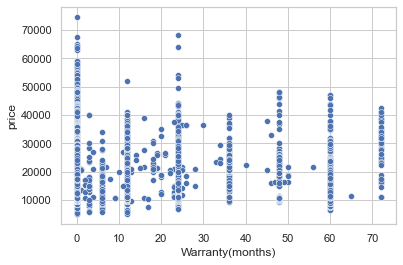

In [27]:
sns.scatterplot(data=df, x="Warranty(months)", y="price");

The values seem normal in this column

### Column: Nr. of Doors

In [28]:
#There are some cars with 1 and 7 doors
df['Nr. of Doors'].value_counts(dropna=False)

5.0    11784
4.0     3079
3.0      831
2.0      219
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

In [31]:
df[(df['Nr. of Doors'] == 7.0) | (df['Nr. of Doors'] == 1.0)]

,make_model,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Gears,Upholstery_Texture,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
13782,Renault Clio,8500.0,VAT deductible,41493.0,3.0,1.0,55.0,Used,unknown,12.0,White,unknown,Compact,1.0,5.0,Manual,1461.0,4.0,1071.0,front,Diesel,85.0,unknown,5.0,unknown,3.3,0.0,0.0,0.0,0.0
15202,Renault Espace,21600.0,Price negotiable,78000.0,3.0,1.0,118.0,Used,unknown,0.0,Brown,Metallic,Van,7.0,5.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,6.0,Full leather,4.6,2.0,18.0,7.0,27.0


In [33]:
#Renault Espace Vans have mostly 4 or 5 doors
df.loc[(df['make_model'] == 'Renault Espace') & (df['Body'] == 'Van'), ['Nr. of Doors']].value_counts()

Nr. of Doors
5.0             712
4.0              90
7.0               1
dtype: int64

In [34]:
#Renault Clio COmpacts have mostly 4 or 5 doors
df.loc[(df['make_model'] == 'Renault Clio') & (df['Body'] == 'Compact'), ['Nr. of Doors']].value_counts()

Nr. of Doors
5.0             313
4.0             170
1.0               1
dtype: int64

In [35]:
#I will convert both values to 5 which seems more likely
df.loc[df['Nr. of Doors']==1,'Nr. of Doors'] = 5

In [36]:
df.loc[df['Nr. of Doors']==7,'Nr. of Doors'] = 5

### Column: Nr. of Seats

In [63]:
#Three cars have unlikely seat numbers, 6 and 3.
df['Nr. of Seats'].value_counts(dropna=False)

5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [38]:
df[(df['Nr. of Seats']==6)|(df['Nr. of Seats']==3)]

,make_model,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Gears,Upholstery_Texture,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
582,Audi A1,13500.0,VAT deductible,100000.000000,2.0,1.0,70.0,Used,unknown,12.0,White,Metallic,Compact,5.0,6.0,Manual,1000.0,4.0,1500.0,front,Benzine,97.0,Euro 6,5.0,unknown,4.2,1.0,1.0,1.0,1.0
1636,Audi A1,23090.0,VAT non-deductible,9821.000000,1.0,1.0,141.0,Used,Yes,0.0,Black,Metallic,Compact,2.0,3.0,Automatic,1798.0,4.0,1280.0,front,Benzine,134.0,Euro 6,7.0,Part leather,5.8,6.0,14.0,9.0,19.0
15890,Renault Espace,42490.0,VAT deductible,1144.411765,0.0,1.0,147.0,New,unknown,0.0,Black,unknown,Station wagon,5.0,6.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,6.0,Cloth,5.7,2.0,16.0,5.0,14.0


In [39]:
#Check these models' number of seats
df.loc[(df['make_model'] == 'Audi A1') & (df['Body'] == 'Compact'), ['Nr. of Seats']].value_counts()

Nr. of Seats
5.0             606
4.0             431
3.0               1
6.0               1
dtype: int64

In [40]:
df.loc[(df['make_model'] == 'Renault Espace') & (df['Body'] == 'Station wagon'), ['Nr. of Seats']].value_counts()

Nr. of Seats
5.0             71
7.0             19
6.0              1
dtype: int64

In [48]:
#I will convert 3 and 6 values to 5
df.loc[df['Nr. of Seats']==3,'Nr. of Seats'] = 5
df.loc[df['Nr. of Seats']==6,'Nr. of Seats'] = 5

### Column: Displacement

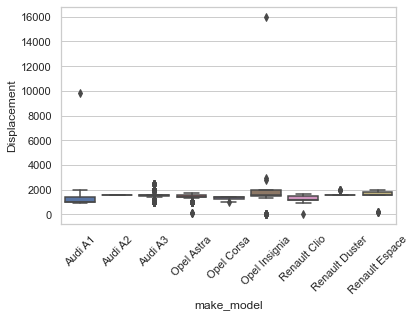

In [49]:
sns.boxplot(y='Displacement',data=df, x='make_model')
plt.xticks(rotation=45);

There are some too high and too low values

In [55]:
#We assume that this value was given mistakenly by the users. So, we can assign the model displacement mean to this value
audi_a1_disp = df.loc[(df['make_model'] == 'Audi A1'), ['Displacement']].mean()

In [56]:
df.loc[(df['Displacement'] > 5000) & (df['make_model'] == 'Audi A1'),'Displacement'] = audi_a1_disp

In [60]:
#We'll apply same method to Opel Insignia
insignia_disp = df.loc[(df['make_model'] == 'Opel Insignia'), ['Displacement']].mean()

In [61]:
df.loc[(df['Displacement'] > 5000) & (df['make_model'] == 'Opel Insignia'),'Displacement'] = insignia_disp

In [62]:
#I will convert too low displacement values first to NULL and refill them with our filling method.
df[df.Displacement < 600].Displacement = np.nan

In [63]:
mode_disp = df.groupby(['make_model','Body','hp'])['Displacement']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["Displacement"] = df["Displacement"].fillna(mode_disp)

In [64]:
df.Displacement.isnull().sum()

0

### Column: Cylinders

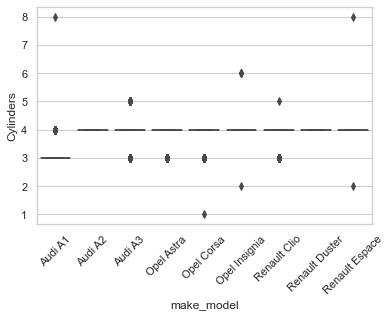

In [65]:
sns.boxplot(y='Cylinders',data=df, x='make_model')
plt.xticks(rotation=45);

In [67]:
#I will convert 8s to 4 which is general average
df.loc[df.Cylinders == 8.0, 'Cylinders'] = 4

In [68]:
df.Cylinders.value_counts(dropna=False)

4.0    12440
3.0     3447
5.0       22
6.0        3
2.0        2
1.0        1
Name: Cylinders, dtype: int64

In [69]:
#Check the values with too low cylinders
df[(df.Cylinders == 2.0) | (df.Cylinders == 1.0)]

,make_model,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Gears,Upholstery_Texture,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
9956,Opel Corsa,16625.0,VAT deductible,100.0,0.0,1.0,66.0,Pre-registered,unknown,0.0,Black,Metallic,Compact,3.0,5.0,Automatic,1398.0,1.0,1163.0,front,Benzine,140.0,Euro 6,6.0,Cloth,6.0,2.0,13.0,6.0,18.0
11342,Opel Insignia,21900.0,VAT deductible,13600.0,1.0,1.0,100.0,Employee's car,unknown,0.0,Grey,Metallic,Station wagon,5.0,5.0,Automatic,1598.0,2.0,1503.0,front,Diesel,114.0,unknown,6.0,Part leather,5.0,4.0,18.0,6.0,19.0
15835,Renault Espace,47590.0,VAT deductible,6000.0,0.0,1.0,147.0,Employee's car,unknown,0.0,Black,Metallic,Van,5.0,7.0,Automatic,1997.0,2.0,1840.0,front,Diesel,139.0,Euro 6,6.0,Full leather,5.3,1.0,15.0,4.0,16.0


In [70]:
#I will make them 4
df.loc[df.Cylinders == 2.0, 'Cylinders'] = 4

In [71]:
df.loc[df.Cylinders == 1.0, 'Cylinders'] = 4

In [72]:
df.Cylinders.value_counts(dropna=False)

4.0    12443
3.0     3447
5.0       22
6.0        3
Name: Cylinders, dtype: int64

### Column: Weight(kg)

In [74]:
#There are some too low numbers for a car
df['Weight'].describe()

count    15915.000000
mean      1343.725353
std        211.585256
min          1.000000
25%       1163.000000
50%       1279.000000
75%       1485.000000
max       2471.000000
Name: Weight, dtype: float64

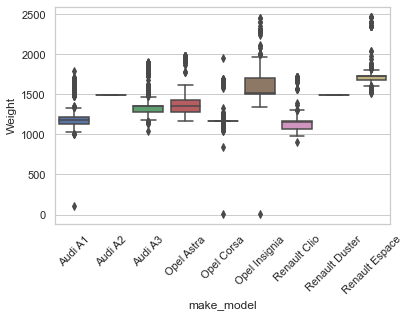

In [76]:
sns.boxplot(y='Weight',data=df, x='make_model')
plt.xticks(rotation=45);

In [77]:
df[df['Weight']<500]

,make_model,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Gears,Upholstery_Texture,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
1143,Audi A1,19229.0,VAT deductible,8263.0,1.0,1.0,70.0,Used,Yes,36.0,Beige,Metallic,Compact,5.0,4.0,Automatic,999.0,3.0,102.0,front,Benzine,102.0,Euro 6,7.0,Cloth,4.6,5.0,13.0,7.0,15.0
8355,Opel Corsa,12945.0,VAT non-deductible,2015.0,1.0,1.0,66.0,Used,Yes,0.0,Silver,Metallic,Compact,5.0,5.0,Automatic,1398.0,4.0,1.0,front,Benzine,112.0,Euro 6,5.0,Cloth,4.8,1.0,12.0,1.0,5.0
12779,Opel Insignia,39299.0,VAT deductible,10.0,0.0,1.0,121.0,New,unknown,0.0,Black,unknown,Station wagon,5.0,5.0,Manual,1500.0,4.0,1.0,front,Benzine,140.0,unknown,6.0,Cloth,6.0,0.0,2.0,0.0,6.0


In [79]:
#I will assign model weight means to outliers
audi_weight = df[df['make_model'] == 'Audi A1']['Weight'].mean()

In [80]:
df.loc[1143, 'Weight'] = audi_weight

In [82]:
opel_corsa_weight = df[df['make_model'] == 'Opel Corsa']['Weight'].mean()

In [83]:
df.loc[8355, 'Weight'] = opel_corsa_weight

In [85]:
opel_insignia_weight = df[df['make_model'] == 'Opel Insignia']['Weight'].mean()

In [86]:
df.loc[12779, 'Weight'] = opel_insignia_weight

In [88]:
df[df['Weight']<500]

,make_model,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Gears,Upholstery_Texture,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience


### Column: CO2 Emission

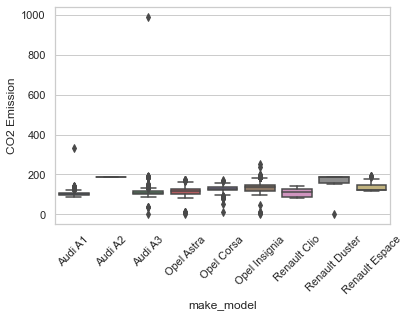

In [90]:
sns.boxplot(y='CO2 Emission',data=df, x='make_model')
plt.xticks(rotation=45);

In [91]:
df[df['CO2 Emission']>300]

,make_model,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Gears,Upholstery_Texture,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
535,Audi A1,12990.0,VAT non-deductible,41200.0,3.0,1.0,70.0,Used,Yes,0.0,Silver,unknown,Compact,5.0,5.0,Manual,999.0,4.0,1135.0,front,Benzine,331.0,Euro 4,5.0,Cloth,13.0,2.0,11.0,0.0,5.0
4556,Audi A3,23500.0,VAT deductible,27815.0,1.0,1.0,81.0,Used,unknown,0.0,Grey,unknown,Sedans,5.0,5.0,Automatic,1598.0,4.0,1360.0,front,Diesel,990.0,unknown,7.0,Other,38.0,0.0,5.0,1.0,3.0


In [92]:
#I will convert high values first to NULL and refill them with our filling method
df.loc[[535, 4556], 'CO2 Emission'] = np.nan

In [94]:
#Check the too low values
df[df['CO2 Emission']<70]

,make_model,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Gears,Upholstery_Texture,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
3612,Audi A3,38450.0,Price negotiable,13800.000000,1.0,1.0,110.0,Used,unknown,0.0,Black,Metallic,Sedans,5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,6.0,Cloth,1.60,4.0,22.0,10.0,16.0
3615,Audi A3,35899.0,VAT non-deductible,20880.000000,1.0,1.0,110.0,Used,unknown,0.0,White,unknown,Sedans,5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,6.0,unknown,1.60,1.0,9.0,2.0,4.0
3617,Audi A3,38000.0,Price negotiable,12000.000000,1.0,1.0,110.0,Used,unknown,0.0,Grey,Metallic,Sedans,5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,6.0,Part leather,1.60,6.0,24.0,9.0,17.0
4089,Audi A3,19500.0,VAT deductible,23644.000000,1.0,1.0,85.0,Used,unknown,0.0,Blue,unknown,Sedans,5.0,5.0,Manual,1598.0,4.0,1360.0,front,Diesel,1.0,unknown,6.0,Other,40.00,0.0,5.0,2.0,0.0
5818,Opel Astra,14990.0,VAT deductible,85182.000000,3.0,1.0,110.0,Used,unknown,0.0,Brown,Metallic,Sedans,5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,6.0,Cloth,5.10,2.0,19.0,6.0,17.0
6397,Opel Astra,6950.0,VAT non-deductible,88000.000000,0.0,1.0,81.0,Used,unknown,0.0,Grey,unknown,Sedans,5.0,5.0,Manual,1700.0,4.0,1425.0,front,Diesel,5.0,unknown,6.0,unknown,4.50,1.0,9.0,1.0,5.0
6578,Opel Astra,17850.0,VAT deductible,29900.000000,1.0,1.0,110.0,Used,Yes,0.0,Green,Metallic,Station wagon,5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,6.0,Cloth,5.10,4.0,14.0,5.0,19.0
6579,Opel Astra,17850.0,VAT deductible,29900.000000,1.0,1.0,110.0,Used,Yes,0.0,Green,Metallic,Station wagon,5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,6.0,Cloth,5.10,4.0,14.0,5.0,19.0
8110,Opel Astra,18380.0,VAT deductible,1020.000000,0.0,1.0,77.0,Used,Yes,60.0,Silver,Metallic,Station wagon,5.0,5.0,Manual,999.0,3.0,1273.0,front,Benzine,14.0,unknown,5.0,Cloth,5.00,1.0,14.0,6.0,18.0
8217,Opel Astra,17850.0,VAT deductible,4500.000000,0.0,1.0,92.0,Employee's car,Yes,0.0,Red,unknown,Sedans,5.0,5.0,Manual,1399.0,4.0,1278.0,front,Benzine,0.0,Euro 6,6.0,Cloth,0.00,2.0,15.0,6.0,16.0


In [96]:
#Convert them to NULL
df.loc[df[df['CO2 Emission']<70].index, 'CO2 Emission'] = np.nan

In [97]:
mode_CO2 = df.groupby(['make_model','Displacement'])['CO2 Emission']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission'] = df['CO2 Emission'].fillna(mode_CO2)
mode_CO2_1 = df.groupby(['make_model'])['CO2 Emission']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission'] = df['CO2 Emission'].fillna(mode_CO2_1)
mode_CO2_2 = df.groupby(['Body'])['CO2 Emission']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission'] = df['CO2 Emission'].fillna(mode_CO2_2)

In [98]:
df['CO2 Emission'].isnull().sum()

0

### Column: Gears

In [99]:
#The values less than 5 is not normal for cars with registration date 2016 and more
df.Gears.value_counts(dropna=False)

6.0     8614
5.0     4253
7.0     2810
8.0      224
9.0        6
4.0        2
1.0        2
3.0        2
50.0       1
2.0        1
Name: Gears, dtype: int64

In [100]:
#I will change them as 5
df.loc[df[df['Gears']<5].index, 'Gears'] = 5

In [103]:
#50 is more likely to be 5
df.loc[df[df['Gears']==50.0].index, 'Gears'] = 5

### Column: Consumption_combined

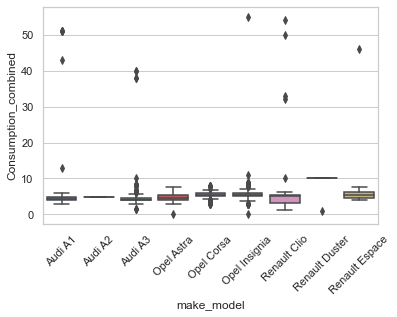

In [104]:
sns.boxplot(y='Consumption_combined',data=df, x='make_model')
plt.xticks(rotation=45);

In [105]:
#Convert too low and too high values to NULL and refill them with our filling method
df.loc[(df['Consumption_combined']>20)|(df['Consumption_combined']<3), 'Consumption_combined'] = np.nan

In [106]:
df['Consumption_combined'].isnull().sum()

22

In [107]:
mode_Cons= df.groupby(['CO2 Emission'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons)
mode_Cons1= df.groupby(['Displacement'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons1)
mode_Cons2= df.groupby(['make_model'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons2)

In [108]:
df['Consumption_combined'].isnull().sum()

0

### Feature Columns

Extras, Safety & Security, Entertainment & Media, and Comfort & Convenience columns consist of number of features. So, it is not unlikely to see them vary between a large range.

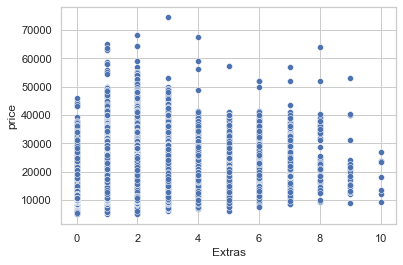

In [112]:
sns.scatterplot(data=df, x="Extras", y="price");

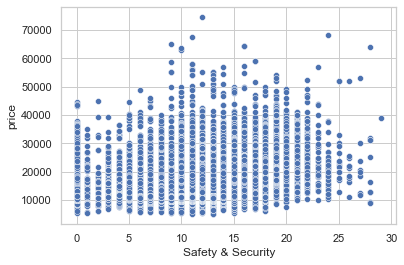

In [113]:
sns.scatterplot(data=df, x="Safety & Security", y="price");

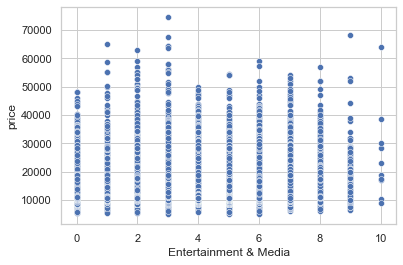

In [114]:
sns.scatterplot(data=df, x="Entertainment & Media", y="price");

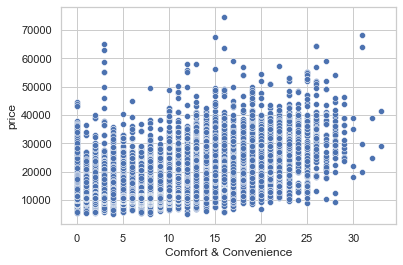

In [115]:
sns.scatterplot(data=df, x="Comfort & Convenience", y="price");

### Some Additional Changes in Type Column

In [109]:
#There are some values with age more than zero but still seems as New. I will convert them to 'Used'
df.loc[df[(df.registration > 0) & (df.Type == 'New')].index, 'Type'] = 'Used'

In [110]:
df.describe()

,price,km,registration,prev_owner,hp,Warranty(months),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears,Consumption_combined,Extras,Safety & Security,Entertainment & Media,Comfort & Convenience
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32112.271368,1.394848,0.998115,88.508828,6.686334,4.660823,4.952246,1425.228338,3.785171,1343.967862,117.649890,5.938109,4.843396,2.042915,12.004084,4.283380,11.568080
std,7381.679318,36972.668616,1.122193,0.327986,26.658493,13.332171,0.641214,0.476262,284.335192,0.415432,210.835890,18.334517,0.707242,0.927613,1.695303,5.002090,2.324957,6.456547
min,4950.000000,0.000000,0.000000,0.000000,51.000000,0.000000,2.000000,2.000000,1.000000,3.000000,840.000000,80.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,12850.000000,2558.013043,0.000000,1.000000,66.000000,0.000000,4.000000,5.000000,1229.000000,4.000000,1163.000000,104.000000,5.000000,4.100000,1.000000,10.000000,2.000000,6.000000
50%,16900.000000,20450.000000,1.000000,1.000000,85.000000,0.000000,5.000000,5.000000,1461.000000,4.000000,1279.000000,117.000000,6.000000,4.800000,2.000000,13.000000,5.000000,12.000000
75%,21900.000000,46928.000000,2.000000,1.000000,103.000000,12.000000,5.000000,5.000000,1598.000000,4.000000,1485.000000,128.000000,6.000000,5.400000,3.000000,15.000000,6.000000,16.000000
max,74600.000000,317000.000000,3.000000,4.000000,294.000000,72.000000,5.000000,7.000000,2967.000000,6.000000,2471.000000,253.000000,9.000000,13.000000,10.000000,29.000000,10.000000,33.000000


In [111]:
df.to_csv('auto_scout_normalized.csv', index = False)